# Demo Image Augmentation

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image






In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
# Inladen van de datasets

training_data = unpickle('./cifar-10/data_batch_1')
test_data = unpickle('./cifar-10/test_batch')


X_train = training_data.get(b'data')
train_labels = training_data.get(b'labels')
X_test = test_data.get(b'data')
test_labels = test_data.get(b'labels')

# Reshape into Tensorflow format (number of images, width, height, color channels)
X_train = X_train.reshape((len(X_train),3,32,32)).transpose(0,2,3,1)
X_test  = X_test.reshape((len(X_test),3,32,32)).transpose(0,2,3,1)

print(X_train.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)


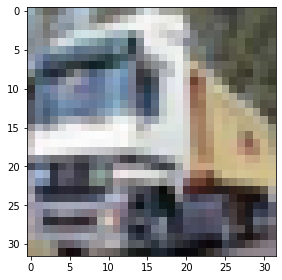

In [4]:
# Toon afbeelding

imshow(X_train[1])

In [5]:
# Image normalization

# Normalisatie
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding van de target labels

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(y_train.shape)

(10000, 10)


In [6]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 # 
epochs = 100 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols,3)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Trainen van het CNN
history = model.fit(X_train, y_train,batch_size=batch_size, epochs=epochs, validation_data = (X_test,y_test), verbose=1)

Epoch 1/100
157/157 [==============================] - 2s 15ms/step - loss: 2.0458 - accuracy: 0.2359 - val_loss: 1.8347 - val_accuracy: 0.3548
Epoch 2/100
157/157 [==============================] - 2s 14ms/step - loss: 1.7543 - accuracy: 0.3608 - val_loss: 1.6055 - val_accuracy: 0.4244
Epoch 3/100
157/157 [==============================] - 2s 14ms/step - loss: 1.5878 - accuracy: 0.4228 - val_loss: 1.5019 - val_accuracy: 0.4643
Epoch 4/100
157/157 [==============================] - 2s 14ms/step - loss: 1.4808 - accuracy: 0.4582 - val_loss: 1.4614 - val_accuracy: 0.4671
Epoch 5/100
157/157 [==============================] - 2s 14ms/step - loss: 1.4084 - accuracy: 0.4931 - val_loss: 1.3877 - val_accuracy: 0.5081
Epoch 6/100
157/157 [==============================] - 2s 14ms/step - loss: 1.3486 - accuracy: 0.5222 - val_loss: 1.3241 - val_accuracy: 0.5251
Epoch 7/100
157/157 [==============================] - 2s 14ms/step - loss: 1.2924 - accuracy: 0.5335 - val_loss: 1.3552 - val_accuracy:

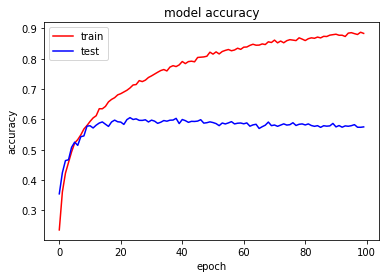

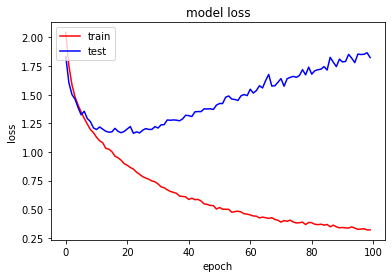

In [7]:
# Plot of the training history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Image augmentation

In [8]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 # 
epochs = 100 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols,3)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Image augmentation ####

from tensorflow.keras.preprocessing.image import ImageDataGenerator

 
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
horizontal_flip=True, fill_mode="nearest")
 
# train the network
history_aug = model.fit_generator(aug.flow(X_train, y_train, batch_size=batch_size),
steps_per_epoch=len(X_train) // batch_size, epochs=epochs,validation_data = (X_test,y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
156/156 [==============================] - 4s 27ms/step - loss: 2.0978 - accuracy: 0.2181 - val_loss: 1.8421 - val_accuracy: 0.3483
Epoch 2/100
156/156 [==============================] - 4s 26ms/step - loss: 1.8848 - accuracy: 0.3003 - val_loss: 1.7013 - val_accuracy: 0.3880
Epoch 3/100
156/156 [==============================] - 4s 26ms/step - loss: 1.8299 - accuracy: 0.3187 - val_loss: 1.6838 - val_accuracy: 0.3725
Epoch 4/100
156/156 [==============================] - 4s 26ms/step - loss: 1.7574 - accuracy: 0.3461 - val_loss: 1.6259 - val_accuracy: 0.4032
Epoch 5/100
156/156 [==============================] - 4s 26ms/step - loss: 1.7222 - accuracy: 0.3651 - val_loss: 1.5182 - val_accuracy: 0.4405
Epoch 6/100
156/156 [==============================] - 4s 26ms/step - loss: 1.6868 - accuracy: 0.3724 - val_loss: 1.5017 - val_accuracy: 0.4548
Epoch 7/100
156/156 [==============================] - 4s 26

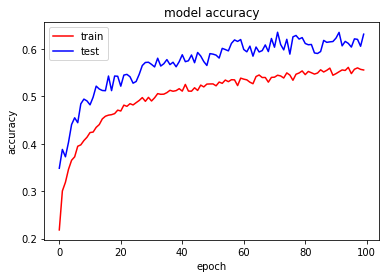

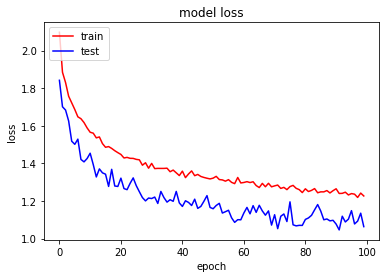

In [9]:
# Plot of the training history

# Accuray 
plt.plot(history_aug.history['accuracy'],'r')
plt.plot(history_aug.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history_aug.history['loss'],'r')
plt.plot(history_aug.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

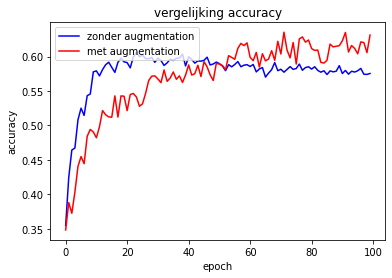

In [10]:
# Vergelijking tussen CNN zonder en met image augmentation

# Accuray 
plt.plot(history.history['val_accuracy'],'b')
plt.plot(history_aug.history['val_accuracy'],'r')
plt.title('vergelijking accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['zonder augmentation', 'met augmentation'], loc='upper left')
plt.show()